In [3]:
from ema_workbench.util import utilities
from ema_workbench.analysis import feature_scoring, dimensional_stacking
from custom_problem_formulation import get_model_for_problem_formulation

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
dike_model, planning_steps = get_model_for_problem_formulation(3)
experiments, outcomes = utilities.load_results('./results/base_case.tar.gz')
experiments = experiments.drop(columns=[l.name for l in dike_model.levers])

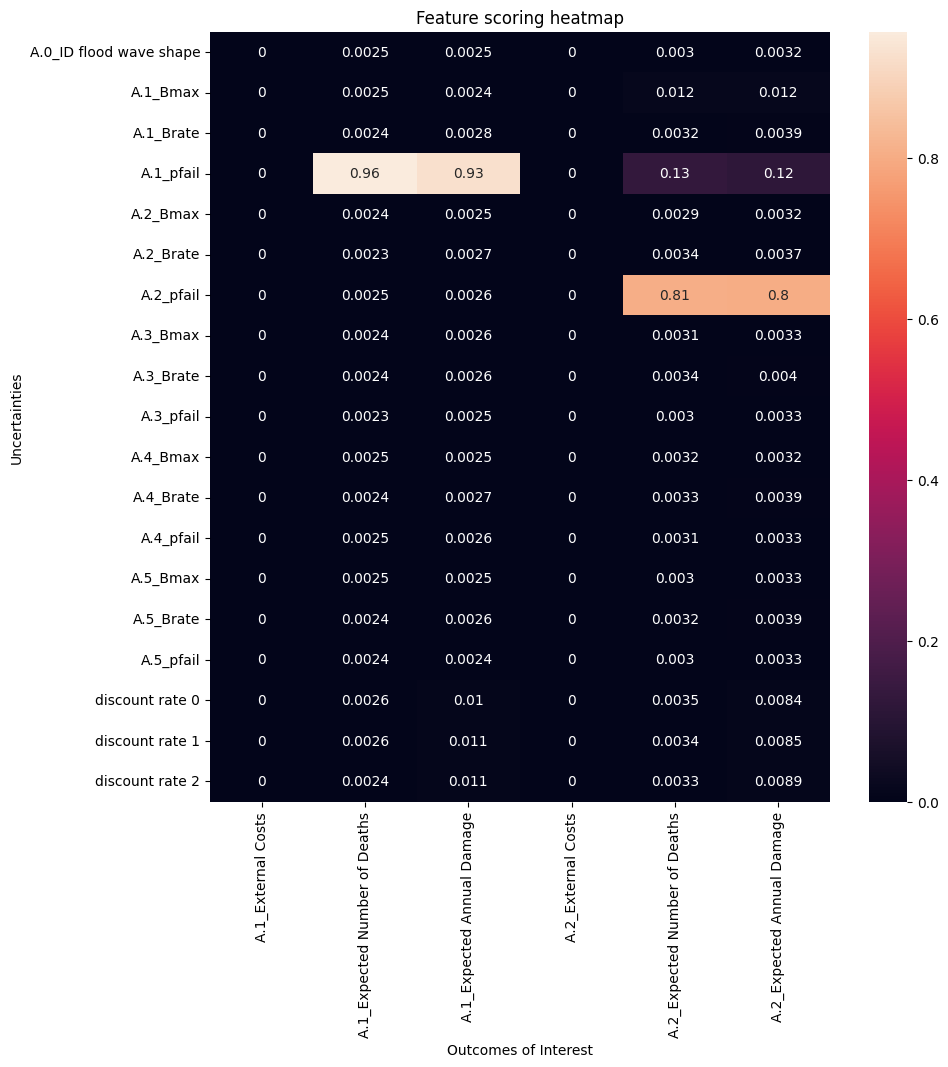

In [6]:
feature_scores = feature_scoring.get_feature_scores_all(experiments, outcomes)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(feature_scores, annot=True, ax=ax)

plt.title('Feature scoring heatmap')
plt.xlabel('Outcomes of Interest')
plt.ylabel('Uncertainties')
plt.savefig('./images/Feature_Scoring_Uncertainties.png')
plt.show()